In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
# Load featured data
DATA_PATH = "../../data/featured-data.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,marital_status,daytime_evening_attendance,previous_qualification,previous_qualification_grade,admission_grade,is_displaced,educational_special_needs,is_debtor,tuition_fees_up_to_date,gender,is_scholarship_holder,age_at_enrollment,curricular_units_1st_sem_approved,curricular_units_1st_sem_grade,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,Target
0,1,1,1,122.0,127.3,1,0,0,1,1,0,20,0,0.000000,0,0.000000,0,0
1,1,1,1,160.0,142.5,1,0,0,0,1,0,19,6,14.000000,6,13.666667,0,1
2,1,1,1,122.0,124.8,1,0,0,0,1,0,19,0,0.000000,0,0.000000,0,0
3,1,1,1,122.0,119.6,1,0,0,1,0,0,20,6,13.428571,5,12.400000,0,1
4,2,0,1,100.0,141.5,0,0,0,1,0,0,45,5,12.333333,6,13.000000,0,1


In [3]:
# Dataset Info
print("Shape:", df.shape)
df.info()

Shape: (3630, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                3630 non-null   int64  
 1   daytime_evening_attendance                    3630 non-null   int64  
 2   previous_qualification                        3630 non-null   int64  
 3   previous_qualification_grade                  3630 non-null   float64
 4   admission_grade                               3630 non-null   float64
 5   is_displaced                                  3630 non-null   int64  
 6   educational_special_needs                     3630 non-null   int64  
 7   is_debtor                                     3630 non-null   int64  
 8   tuition_fees_up_to_date                       3630 non-null   int64  
 9   gender                                       

In [4]:
# Prepare Features and Target
target_col = "Target"

X = df.drop(columns=[target_col])
y = df[target_col]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2722, 17)
Test size: (908, 17)


In [6]:
# Pipeline (Scaler + Model)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

In [7]:
# Hyperparameter Grid 
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

In [8]:
# Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [9]:
# Train model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [10]:
# Best Model & Best Parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:\n", best_params)

Best Parameters:
 {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [11]:
# Cross-Validation Results Analysis
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.402295,1.056568,0.315901,0.163430,None,2,100,"{'model__max_depth': None, 'model__min_samples...",0.877064,0.895413,0.891544,0.887868,0.900735,0.890525,0.007968,16
1,11.836535,0.548449,0.511086,0.114865,None,2,200,"{'model__max_depth': None, 'model__min_samples...",0.875229,0.897248,0.895221,0.891544,0.898897,0.891628,0.008559,13
2,12.399928,1.916305,0.406739,0.030659,None,2,300,"{'model__max_depth': None, 'model__min_samples...",0.869725,0.895413,0.895221,0.887868,0.897059,0.889057,0.010174,17
3,3.358836,0.065901,0.145306,0.037487,None,5,100,"{'model__max_depth': None, 'model__min_samples...",0.875229,0.902752,0.891544,0.895221,0.904412,0.893832,0.010438,4
4,6.570467,0.076955,0.281618,0.033974,None,5,200,"{'model__max_depth': None, 'model__min_samples...",0.875229,0.902752,0.895221,0.895221,0.900735,0.893832,0.009769,4


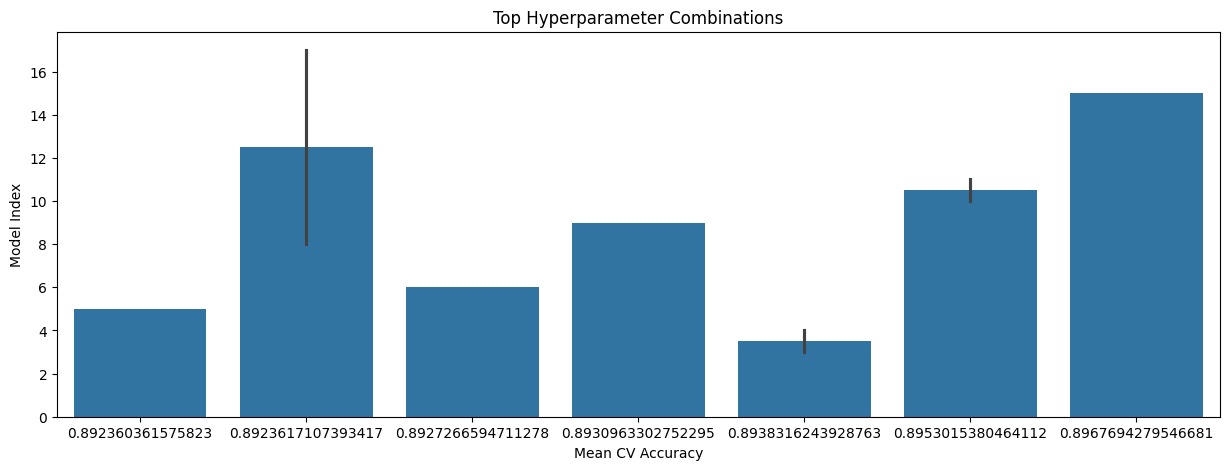

In [12]:
# best vs worst model comparison
top_models = cv_results.sort_values(
    by="mean_test_score",
    ascending=False
).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(
    data=top_models,
    x="mean_test_score",
    y=top_models.index
)
plt.title("Top Hyperparameter Combinations")
plt.xlabel("Mean CV Accuracy")
plt.ylabel("Model Index")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\1412650811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_results, x='mean_test_score', y='params_str', palette='magma')


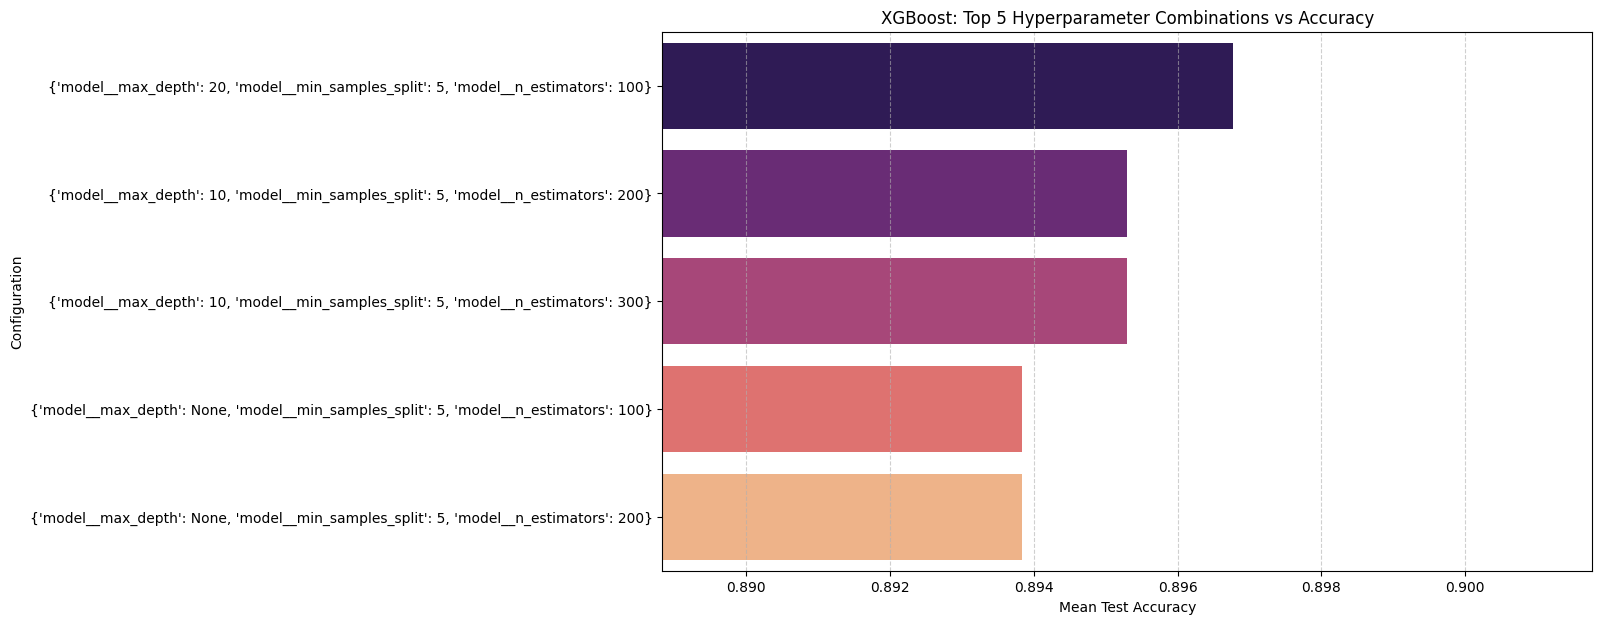

In [13]:
# result dataframe for all combinations
results_df = pd.DataFrame(grid_search.cv_results_)
top_5_results = results_df.nlargest(5, 'mean_test_score')

# Convert params to string for better visualization
top_5_results['params_str'] = top_5_results['params'].apply(lambda x: str(x))

plt.figure(figsize=(12, 7))
sns.barplot(data=top_5_results, x='mean_test_score', y='params_str', palette='magma')
plt.xlim(top_5_results['mean_test_score'].min() - 0.005, top_5_results['mean_test_score'].max() + 0.005)
plt.title('XGBoost: Top 5 Hyperparameter Combinations vs Accuracy')
plt.xlabel('Mean Test Accuracy')
plt.ylabel('Configuration')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [14]:
# Evaluate on Test Set
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8986784140969163

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       355
           1       0.89      0.95      0.92       553

    accuracy                           0.90       908
   macro avg       0.90      0.88      0.89       908
weighted avg       0.90      0.90      0.90       908



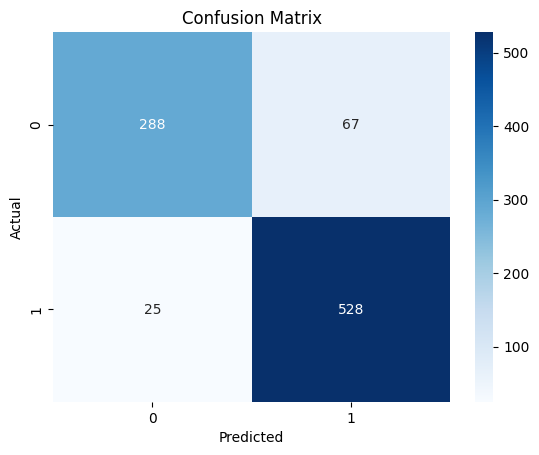

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Save the test data
joblib.dump(X_test, "../../models & test data/random-forest/random-forest-X_test.pkl")
joblib.dump(y_test, "../../models & test data/random-forest/random-forest-y_test.pkl")

['../../models & test data/random-forest/random-forest-y_test.pkl']

In [17]:
# Save the best model
joblib.dump(best_model, "../../models & test data/random-forest/random-forest-model.pkl")

['../../models & test data/random-forest/random-forest-model.pkl']